In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
basepath = '../data/jhw_2024-05-13'
# model = basepath+'/stavanger_mogen' #'tromso_dijkstra'
model = basepath+'/tromso_dijkstra' #''

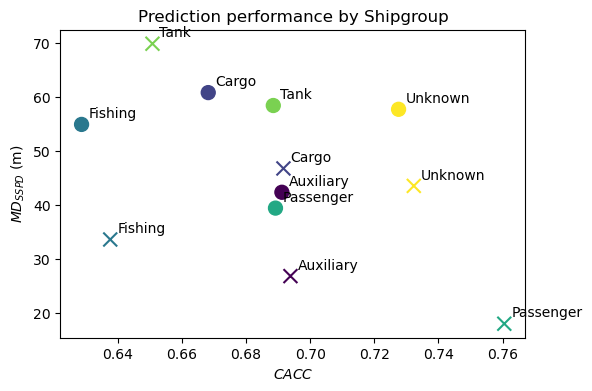

In [4]:
# Plot prediction performance by ship group

# Get eval data of model trained on all shiptypes and plot results
df = pd.read_csv(model+'_all_types.csv')
# drop rows where ship type is Tug
evaluation_results_meta = df[df['skipsgruppe'] != 'Tug']

# get choice accuracy and SSPD by shipgroup
# sspd_by_group = evaluation_results_meta.groupby(['skipsgruppe'])['SSPD'].mean()
sspd_by_group = evaluation_results_meta.groupby(['skipsgruppe'])['SSPD'].median()
cacc_by_group = evaluation_results_meta.groupby(['skipsgruppe'])['choice_accuracy'].mean()

x = cacc_by_group.values
y = sspd_by_group.values
categories = sspd_by_group.index

fig, ax = plt.subplots(figsize=[6, 4])

# Scatter plot with different colors and markers for each category
scatter = ax.scatter(x, y, c=range(len(categories)), cmap='viridis', marker='o', s=100)

# Annotate each point with the ship category name
for i, category in enumerate(categories):
    ax.annotate(category, (x[i], y[i]), textcoords="offset points", xytext=(5,5), ha='left')


# Get eval data of models trained on individual shiptypes and plot results
#categories = ['Cargo', 'Tank', 'Fishing', 'Auxiliary', 'Passenger', 'Unknown']
x = []
y = []
for category in categories:
    evaluation_results_meta = pd.read_csv(model+'_'+category+'.csv')
    sspd_by_group = evaluation_results_meta['SSPD'].median()
    cacc_by_group = evaluation_results_meta['choice_accuracy'].mean()
    x.append(cacc_by_group)
    y.append(sspd_by_group)

scatter = ax.scatter(x, y, c=range(len(categories)), cmap='viridis', marker='x', s=100)

# Annotate each point with the ship category name
for i, category in enumerate(categories):
    ax.annotate(category, (x[i], y[i]), textcoords="offset points", xytext=(5,5), ha='left')
    

#max_x_value = max(x)
#max_y_value = max(y)
#min_x_value = min(x)
#min_y_value = min(y)
#ax.set_xlim(min_x_value-0.01, max_x_value+0.01)
#ax.set_ylim(min_y_value, max_y_value+50)

ax.set_xlabel('$CACC$')
ax.set_ylabel('$MD_{SSPD}$ (m)')
plt.title('Prediction performance by Shipgroup')

plt.show()

# Export

In [5]:
def _load_ship_group(model, ship_group):
    df_loc = pd.read_csv(model+'_'+ship_group+'.csv')
    df_loc = df_loc.loc[df_loc.skipsgruppe==ship_group,['SSPD','choice_accuracy']]
    rdict = {}
    rdict['sspd_mean'] = df_loc['SSPD'].mean()
    rdict['sspd_median'] = df_loc['SSPD'].median()
    rdict['cacc_mean'] = df_loc['choice_accuracy'].mean()
    rdict['cacc_median'] = df_loc['choice_accuracy'].median()
    return rdict

In [6]:
# General Model
df = pd.read_csv(model+'_all_types.csv')
# drop rows where ship type is Tug
df = df[df['skipsgruppe'] != 'Tug']
# df.head(1).T

# n_ship_groups = len(ship_groups)
ship_group = []
sspd_mean = []
sspd_median = []
cacc_mean = []
cacc_median = []
model_type = ['train_all_types'] * len(df.skipsgruppe.unique())
for ship_group_loc in df.skipsgruppe.unique():
    df_loc = df.loc[df.skipsgruppe==ship_group_loc,['SSPD','choice_accuracy']]
    sspd_mean.append(df_loc['SSPD'].mean())
    sspd_median.append(df_loc['SSPD'].median())
    cacc_mean.append(df_loc['choice_accuracy'].mean())
    cacc_median.append(df_loc['choice_accuracy'].median())
    ship_group.append(ship_group_loc)

# Model per Ship Type
for ship_group_loc in df.skipsgruppe.unique():
    rdict = _load_ship_group(model, ship_group_loc)
    sspd_mean.append(rdict['sspd_mean'])
    sspd_median.append(rdict['sspd_median'])
    cacc_mean.append(rdict['cacc_mean'])
    cacc_median.append(rdict['cacc_median'])
    ship_group.append(ship_group_loc)
    model_type.append('per_ship_type')

df_out = pd.DataFrame(data={'model_type': model_type, 'ship_group': ship_group,
                            'sspd_mean': sspd_mean, 'sspd_median': sspd_median, 
                            'cacc_mean': cacc_mean, 'cacc_median': cacc_median})

In [7]:
df_out

,model_type,ship_group,sspd_mean,sspd_median,cacc_mean,cacc_median
0,train_all_types,Cargo,346.345188,60.767679,0.668215,0.727273
1,train_all_types,Passenger,345.307187,39.403512,0.689188,0.758621
2,train_all_types,Unknown,111.565349,57.680246,0.727579,0.750000
3,train_all_types,Fishing,269.283538,54.881366,0.628710,0.673913
4,train_all_types,Auxiliary,242.918204,42.333132,0.691187,0.746429
5,train_all_types,Tank,481.733634,58.379432,0.688507,0.730537
6,per_ship_type,Cargo,229.011233,46.739163,0.691672,0.740741
7,per_ship_type,Passenger,188.120751,18.018932,0.760552,0.835829
8,per_ship_type,Unknown,75.810600,43.512801,0.732331,0.750000
9,per_ship_type,Fishing,198.361907,33.596186,0.637653,0.666667


In [8]:
df_out.to_csv('../data/jhw_2024-05-13/rp_by_shipgroup.csv', index=False)

# Test Plot

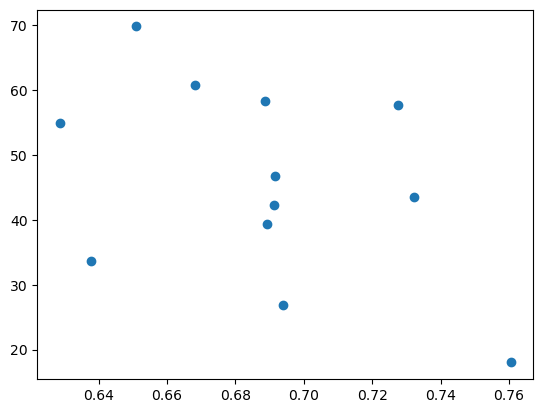

In [9]:
plt.plot(df_out.cacc_mean, df_out.sspd_median, 'o')